In [113]:
import scanpy
import magic
from sklearn import decomposition
import numpy as np
import scprep
import matplotlib.pyplot as plt
import phate
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns

In [114]:
adata = scanpy.read_h5ad('data/all_exocrine_endocrine_processed.h5ad')

In [74]:
usamples = ["WT", "OB/OB", "WT", "HFD"]
lut = {usamples[i]: plt.get_cmap("tab10")(i) for i in range(4)}

In [6]:
gene_subset_only = ["Ins1", 'Ins2', 'Sst', 'Ppy', 'Gcg']

In [7]:
adata_endocrine = adata[adata.obs['isEndocrine']]

In [ ]:
adata_endocrine.obs['samples'] = adata_endocrine.obs['sample'].map({'CG4_wt': 'WT', 'CG10_wt': 'WT', 'CG11-hfd': 'HFD', 'CG5_ob/ob': 'OB/OB'})
adata_endocrine.obs['TrajectoryNet_timepoints'] = adata_endocrine.obs['samples'].map({'WT': 0, 'HFD': 1, 'OB/OB': 2})

In [101]:
del(adata_endocrine.obsm['X_phate']) # from all endocrine/exocrine

#### combined_magic_pc_norm with bad beta cells

In [ ]:
magic_op = magic.MAGIC(random_state=42)
data_magic = magic_op.fit_transform(adata_endocrine_without_high_genes)

In [13]:
pc_op = decomposition.PCA(n_components=10, random_state=42)
data_magic_pc = pc_op.fit_transform(data_magic.to_df())
data_magic_pc_norm = data_magic_pc / np.std(data_magic_pc[:, 0])

In [28]:
adata_endocrine.obsm['data_magic_pc_norm'] = data_magic_pc_norm

In [ ]:
c_op = KMeans(n_clusters=8)
clusters = c_op.fit_predict(data_magic_pc_norm)
adata_endocrine.obs['clusters'] = clusters

In [82]:
# coarser clusters for broad cell types
adata_endocrine.obs['clusters'] = adata_endocrine.obs['clusters'].map({0:0, 1:0, 2:1, 3:2, 4:0, 5:3, 6:0, 7:4})

<Axes: >

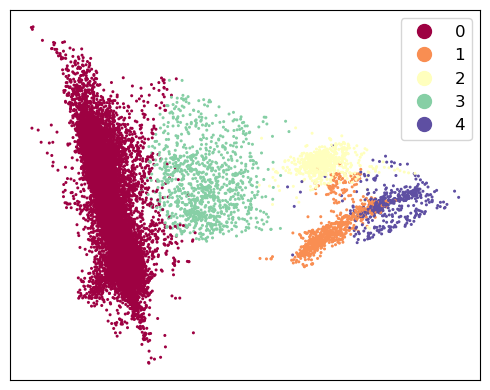

In [84]:
scprep.plot.scatter2d(data_magic_pc_norm, c=adata_endocrine.obs['clusters'],
                      ticks=None, cmap='Spectral', figsize=(5,4))

In [ ]:
adata_endocrine.obs['cell_types'] = adata_endocrine.obs['clusters'].map({0: 'Beta', 1: 'Alpha', 2: 'Delta', 3: 'Polyhormonal', 4: 'PP'})
adata_endocrine.write('data/all_endocrine_processed.h5ad', compression='gzip')